<a href="https://colab.research.google.com/github/maldisco/Instance_segmentation-Strawberry_disease/blob/main/YOLACT_strawberry_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do dataset

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("gdrive/My Drive/Colab Notebooks/proj3-fsi")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install -U labelme2coco

### Juntando os arquivos JSON e convertendo ao formato COCO

In [ ]:
import labelme2coco

train_folder = "train"
test_folder = "test"
val_folder = "val"

train_ann = "train_ann"
test_ann = "test_ann"
val_ann = "val_ann"

labelme2coco.convert(train_folder, train_ann, 1)
labelme2coco.convert(test_folder, test_ann, 1)
labelme2coco.convert(val_folder, val_ann, 1)

There are 1450 listed files in folder train.


Converting labelme annotations to COCO format: 100%|██████████| 1450/1450 [01:03<00:00, 22.78it/s] 
04/23/2022 14:21:04 - INFO - labelme2coco -   Converted annotations in COCO format is exported to train_ann/dataset.json


There are 743 listed files in folder test.


Converting labelme annotations to COCO format: 100%|██████████| 743/743 [00:28<00:00, 26.29it/s] 
04/23/2022 14:21:33 - INFO - labelme2coco -   Converted annotations in COCO format is exported to test_ann/dataset.json


There are 307 listed files in folder val.


Converting labelme annotations to COCO format: 100%|██████████| 307/307 [00:06<00:00, 45.12it/s] 
04/23/2022 14:21:40 - INFO - labelme2coco -   Converted annotations in COCO format is exported to val_ann/dataset.json


### Criando um diretório treino/validação para as imagens

In [ ]:
import shutil

old_dir = "/content/gdrive/MyDrive/Colab Notebooks/proj3-fsi/train"
new_dir = "/content/gdrive/MyDrive/Colab Notebooks/proj3-fsi/data/strawberry_disease/train"
    
for filename in os.scandir(old_dir):
     if filename.path.endswith(".jpg"):
         old_path = os.path.abspath(filename.path)
         new_path = os.path.join(new_dir, filename.name)
         shutil.move(old_path, new_path)
     

In [ ]:
old_dir = "/content/gdrive/MyDrive/Colab Notebooks/proj3-fsi/val"
new_dir = "/content/gdrive/MyDrive/Colab Notebooks/proj3-fsi/data/strawberry_disease/val"
    
for filename in os.scandir(old_dir):
     if filename.path.endswith(".jpg"):
         old_path = os.path.abspath(filename.path)
         new_path = os.path.join(new_dir, filename.name)
         shutil.move(old_path, new_path)

# Treinamento da rede

O DCNv2 somente funciona do modo esperado com o torch 1.4 e torchvision 0.5.

In [4]:
!pip install torch==1.4.0 torchvision==0.5.0

     |████████████████████████████████| 753.4 MB 6.9 kB/s 
     |████████████████████████████████| 4.0 MB 39.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.


In [3]:
!python external/DCNv2/setup.py build develop

running build
running build_ext
running develop
running egg_info
writing DCNv2.egg-info/PKG-INFO
writing dependency_links to DCNv2.egg-info/dependency_links.txt
writing top-level names to DCNv2.egg-info/top_level.txt
reading manifest file 'DCNv2.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'DCNv2.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.7/_ext.cpython-37m-x86_64-linux-gnu.so -> 
Creating /usr/local/lib/python3.7/dist-packages/DCNv2.egg-link (link to .)
Adding DCNv2 0.1 to easy-install.pth file

Installed /content/gdrive/MyDrive/Colab Notebooks/proj3-fsi/external/DCNv2
Processing dependencies for DCNv2==0.1
Finished processing dependencies for DCNv2==0.1


### As definições da rede acontecem dentro do arquivo 'configs.py' .

Definição da base de dados.

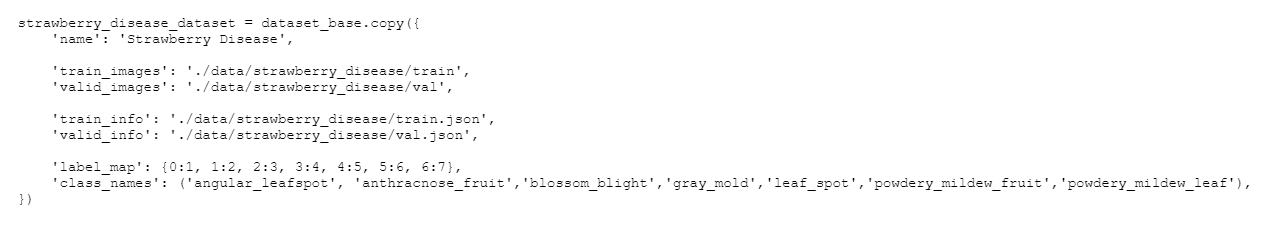

Configurações da rede.

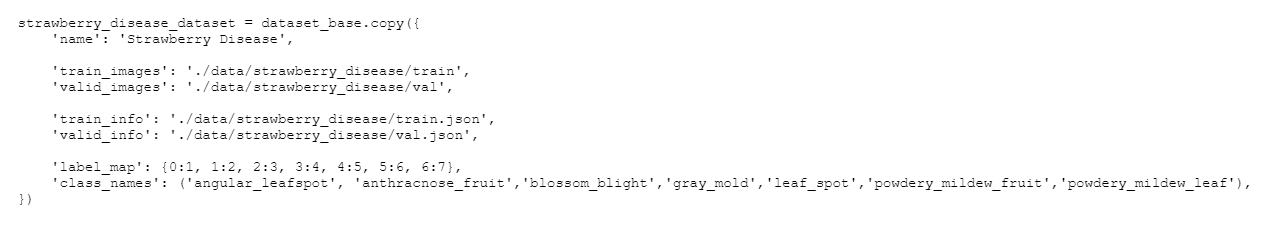

In [6]:
!python ./train.py --config=yolact_plus_resnet50_strawberry_disease_config --resume=weights/Yolact_resnet50_strawberry_disease_165_30000.pth --start_iter=-1

loading annotations into memory...
Done (t=0.89s)
creating index...
index created!
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Resuming training, loading weights/Yolact_resnet50_strawberry_disease_165_30000.pth...
Begin training!

/content/gdrive/My Drive/Colab Notebooks/proj3-fsi/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
/content/gdrive/My Drive/Colab Notebooks/proj3-fsi/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarr

# Avaliação da rede

In [7]:
!python eval.py --trained_model=./weights/Yolact_resnet50_strawberry_disease_182_33028_interrupt.pth --config=yolact_plus_resnet50_strawberry_disease_config --score_threshold=0.3 --top_k=15 --images=data/strawberry_disease/val:output_images

Loading model... Done.

data/strawberry_disease/val/angular_leafspot24.jpg -> output_images/angular_leafspot24.png
data/strawberry_disease/val/angular_leafspot232.jpg -> output_images/angular_leafspot232.png
data/strawberry_disease/val/angular_leafspot14.jpg -> output_images/angular_leafspot14.png
data/strawberry_disease/val/angular_leafspot201.jpg -> output_images/angular_leafspot201.png
data/strawberry_disease/val/angular_leafspot25.jpg -> output_images/angular_leafspot25.png
data/strawberry_disease/val/angular_leafspot16.jpg -> output_images/angular_leafspot16.png
data/strawberry_disease/val/angular_leafspot242.jpg -> output_images/angular_leafspot242.png
data/strawberry_disease/val/angular_leafspot206.jpg -> output_images/angular_leafspot206.png
data/strawberry_disease/val/angular_leafspot197.jpg -> output_images/angular_leafspot197.png
data/strawberry_disease/val/angular_leafspot230.jpg -> output_images/angular_leafspot230.png
data/strawberry_disease/val/angular_leafspot212.jpg ->

# Visualização de imagens de saída

In [14]:
from matplotlib import image as img
from matplotlib import pyplot as plt

saidas = []
# Exemplo classe 1
saidas.append(img.imread("output_images/angular_leafspot4.png"))
# Exemplo classe 2
saidas.append(img.imread("output_images/anthracnose_fruit_rot4.png"))
# Exemplo classe 3
saidas.append(img.imread("output_images/blossom_blight1.png"))
# Exemplo classe 4
saidas.append(img.imread("output_images/gray_mold6.png"))
# Exemplo classe 5
saidas.append(img.imread("output_images/leaf_spot43.png"))
# Exemplo classe 6
saidas.append(img.imread("output_images/powdery_mildew_fruit13.png"))
# Exemplo classe 7
saidas.append(img.imread("output_images/powdery_mildew_leaf60.png"))

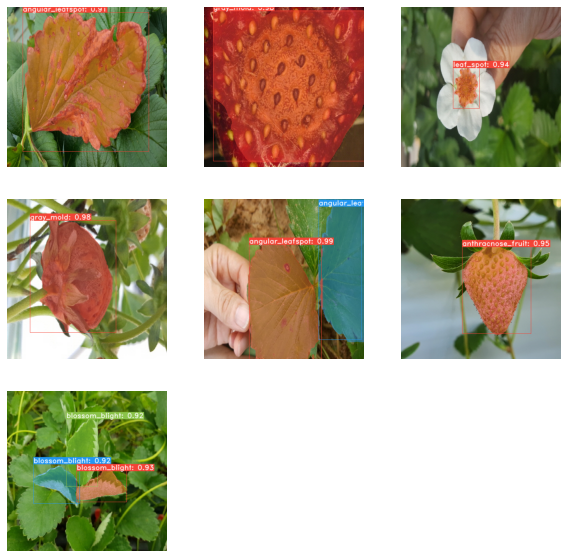

In [18]:
fig = plt.figure(figsize=(10, 10))
for i in  range(len(saidas)):
  fig.add_subplot(3, 3, i+1)
  plt.imshow(saidas[i])
  plt.axis("off")

# Relatório

  É possível enxergar pelas imagens acima que a rede não conseguiu chegar a um resultado razoável. Infelizmente ela exige um tempo de treino muito maior do que o tempo que o colab permite utilizar uma GPU, portanto não foi possível aperfeiçoar a rede até aonde eu gostaria.
  
  
Em uma outra tentativa de utilizar a rede YOLACT++, é muito importante ter uma GPU para poder realizar o treinamento localmente.

